### Episodic Memory Associated Brain Regions

Name: Mohammadparsa Khoshsohbatyazdi AKA Parsa :)

Date: 29/11/2025

Link: https://neurosynth.org/analyses/terms/episodic%20memory/

Project Description: This project analyzes neural activation patterns associated with a cognitive concept using Neurosynth brain maps. The functional maps are overlaid on anatomical MRI scans to visualize activation distribution and extract voxel intensity information. The goal is to visualize the MRI scans, develop reproducible analysis code, and practice proper scientific documentation and version control.

### 1. Imports and Setup
This cell loads the required Python packages used throughout the project. These packages allow to load MRI data, and create visualizations.

In [1]:
# Required libraries for the assignment
import os
import glob
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np

### 2. Automatic File Detection 
This cell searches the data directory for anatomical and functional MRI files based on their file extensions (e.g., `.nii`, `.nii.gz`). This avoids hardcoding file paths and enables the users to reproduce across different folder structures.

In [2]:
# Set relative folder containing MRI files (only change this line)
folder = r"P:\Cognitive Neuropsychology\S1 P2\programing\Home Assignment"

# Find files automatically using glob patterns (pattern passed directly to glob)
anat_files = glob.glob(os.path.join(folder, "*anatom*.nii.gz"))
func_files = glob.glob(os.path.join(folder, "*episodic*.nii.gz"))
# Choose the first match
anat_path = anat_files[0]
func_path = func_files[0]

### 3. Loading MRI Data  
This cell loads the anatomical and functional files using `nibabel`. Once loaded, the files are converted into arrays for  visualization.
`np.nan_to_num` ensures NaNs and infinities won't break plots.

In [3]:
# Load the MRI files with nibabel
anat_img = nib.load(anat_path)
stat_img = nib.load(func_path)
# Convert to numpy array and remove NaNs/infs in one line
data = np.nan_to_num(stat_img.get_fdata())
# Positive voxel values
pos_vals = data[data > 0] 

### 4. Visualization of functional data ontop of the anatomical scan
This cell generates a figure that overlays functional activation on top of the anatomical reference. The visualization includes a title, customized color map, and minimum voxel value to display, and cut coordinates.

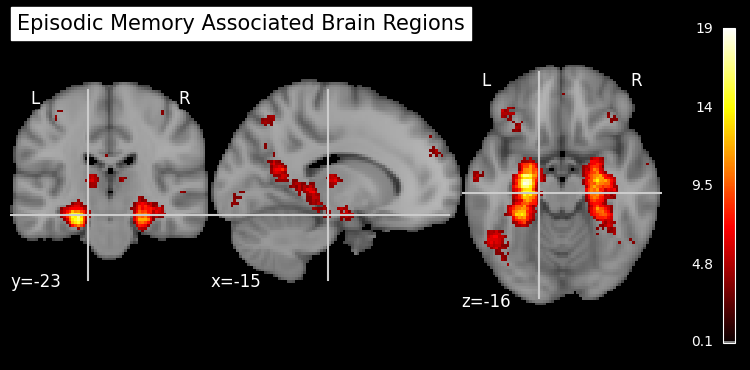

In [4]:
# Visualize the statistical map overlaid on the anatomical image, also threshold chooses the minimum voxel value to display; must be adjusted based on the data.
plotting.plot_stat_map(stat_img, bg_img=anat_img, title="Episodic Memory Associated Brain Regions", cmap="hot", threshold=0.1, cut_coords=(-15, -23, -16))

### 5. Histogram of Functional Data 
This cell creates a histogram of the positive voxel intensity values of your functional MRI data. Also, the colors, bin size, and style is customized.

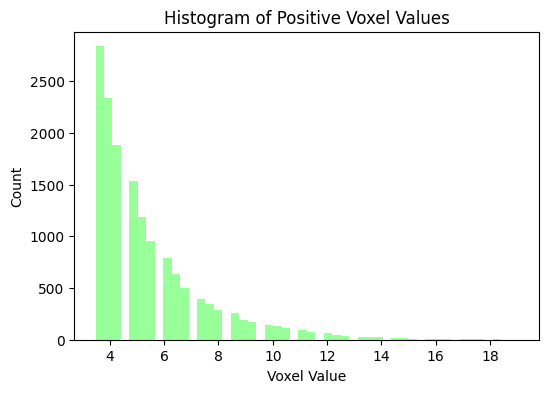

In [5]:
# Creates a new figure with a width of 6 inches and height of 4 inches
plt.figure(figsize=(6, 4))
# Plot a histogram of all positive voxel values,'bins=50' means the values are grouped into 50 intervals, 'color' sets the color of the bars (light green here)
plt.hist(pos_vals, bins=50, color='#99ff99')
# Adds a descriptive title to the figure
plt.title("Histogram of Positive Voxel Values")
# Labels the x-axis to indicate what the values represent
plt.xlabel("Voxel Value")
# Labels the y-axis to show how many voxels fall into each bin
plt.ylabel("Count")
plt.show()